In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
try:
    df = pd.read_csv('../data/ab-test.csv')
    print(df.head())

except Exception as e:
    print(f"Файл не найден: {e}")
    raise

       uid        diff    time group
0   user_1 -103.333333   after  test
1   user_1   -6.000000  before  test
2  user_18  -10.000000   after  test
3  user_18   -3.500000  before  test
4  user_19  -82.333333   after  test


-2186.5


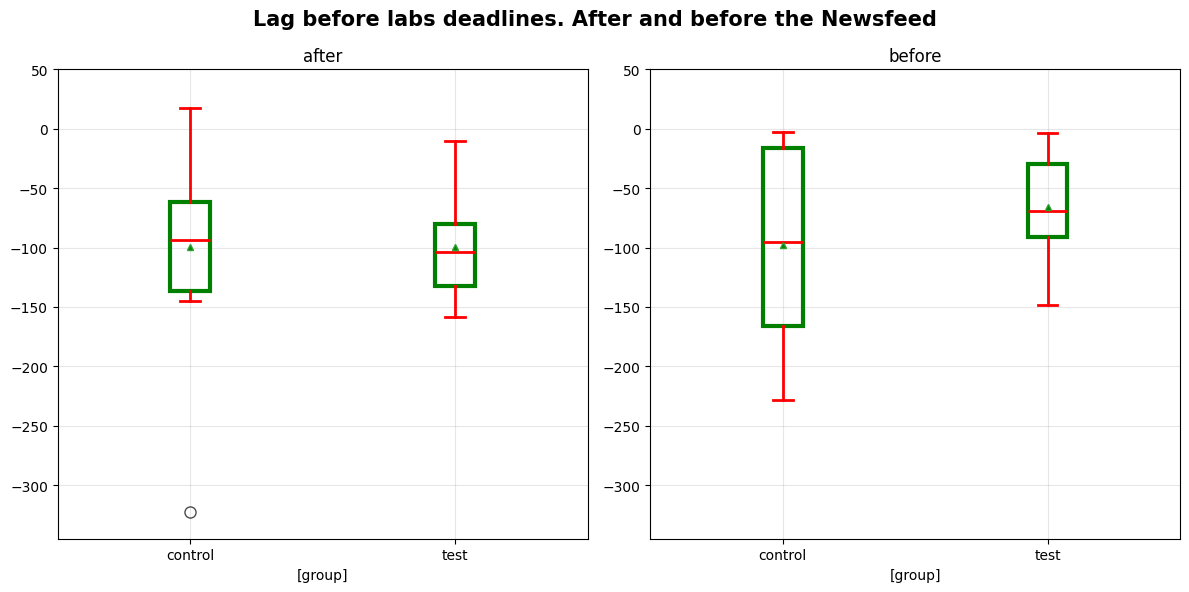

In [17]:
# Настройка фигуры для создания двух subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Данные для after
after_data = [
    df[(df['group'] == 'control') & (df['time'] == 'after')]['diff'],
    df[(df['group'] == 'test') & (df['time'] == 'after')]['diff']
]

# Данные для before
before_data = [
    df[(df['group'] == 'control') & (df['time'] == 'before')]['diff'],
    df[(df['group'] == 'test') & (df['time'] == 'before')]['diff']
]


# Создание boxplot для "after"
box_plot1 = ax1.boxplot(after_data,
                       tick_labels=['control', 'test'],
                       patch_artist=True,
                        showmeans=True,
                       boxprops=dict(linewidth=3),
                       medianprops=dict(linewidth=2, color='red'),
                       whiskerprops=dict(linewidth=2, color='red'),
                       capprops=dict(linewidth=2, color='red'),
                       flierprops=dict(marker='o', markersize=8, alpha=0.7),
                       meanprops=dict(marker='^', markerfacecolor='green', markersize=5))

# Создание boxplot для "before"
box_plot2 = ax2.boxplot(before_data,
                       tick_labels=['control', 'test'],
                        showmeans=True,
                       patch_artist=True,
                       boxprops=dict(linewidth=3),
                       medianprops=dict(linewidth=2, color='red'),
                       whiskerprops=dict(linewidth=2, color='red'),
                       capprops=dict(linewidth=2, color='red'),
                       flierprops=dict(marker='o', markersize=8, alpha=0.7),
                       meanprops=dict(marker='^', markerfacecolor='green', markersize=5))


# Применение цветов к коробкам
for patch in box_plot1['boxes']:
    patch.set_edgecolor('green')
    patch.set_facecolor('none')

for patch in box_plot2['boxes']:
    patch.set_edgecolor('green')
    patch.set_facecolor('none')

# Настройка заголовков и осей
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15, fontweight='bold')
ax1.set_title('after', fontsize=12)
ax2.set_title('before', fontsize=12)

ax1.set_xlabel('[group]', fontsize=10)
ax2.set_xlabel('[group]', fontsize=10)

# Настройка сетки
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)

# Настройка одинаковых пределов по Y для сравнения
y_min = min(df['diff'].min(), -345)
y_max = max(df['diff'].max(), 50)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Автоматическая настройка layout
plt.tight_layout()

# Показ графика
plt.show()

**Вопрос**: «Каков был межквартильный размах контрольной группы до появления Newsfeed? **Ответ**: 80